[Age preprocessing](#1)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
user_feature = pd.read_csv("./data/userFeature_1.csv")
user_feature.head()

,uid,age,gender,marriageStatus,education,consumptionAbility,LBS,interest1,interest5,kw1,...,os,carrier,interest2,interest3,interest4,kw3,topic3,appIdInstall,appIdAction,house
0,44661871,5,1,11,7,1,458.0,93 70 4 75 29 49 27 6 42 73 19 46 56 36 66 11 ...,77 52 100 72 131 37 116 4 79 71 109 8 69 41 6 ...,324391 665516 624687 68812 317814,...,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3036658,3,1,11,7,1,682.0,93 70 77 86 109 98 75 8 29 49 27 6 42 104 53 4...,100 72 80 131 37 116 108 79 29 8 113 6 132 42 ...,775554 90974 493747 150923 440763,...,1,1,47 22 58 24 79 73 9 46 32 70 20 6 33 50 49 30 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77640094,5,2,6 13,7,2,809.0,70 109 47 76 69 28 16 59 49 6 5 73 113 9 17 56...,72 92 37 116 47 78 71 8 30 50 6 111 27 75 46 3...,78223 1119 33249 365112 207605,...,1 2,3,79 46 6 18 29,6 8 10 4 9 1 7 3 5 2,4 10 9 5,36983 29847 9888 51356 55758,5015 2428 8519 5679 2415,61782 7654 22164 56854 17592 16284 51453 61052...,3064 3793 562 3293,NaN
3,68081558,4,1,10,2,0,774.0,NaN,NaN,NaN,...,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61893495,2,1,10,5,1,176.0,70 77 86 118 109 76 69 28 8 59 49 15 83 6 39 4...,72 80 116 101 79 109 113 50 73 6 46 121 60 129,150800 131835 256971 635286 396242,...,1,1,73 70 21 74 10 35,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
user_feature.dtypes

uid                     int64
age                     int64
gender                  int64
marriageStatus         object
education               int64
consumptionAbility      int64
LBS                   float64
interest1              object
interest5              object
kw1                    object
kw2                    object
topic1                 object
topic2                 object
ct                     object
os                     object
carrier                 int64
interest2              object
interest3              object
interest4              object
kw3                    object
topic3                 object
appIdInstall           object
appIdAction            object
house                 float64
dtype: object

In [12]:
user_feature.describe()

,uid,age,gender,education,consumptionAbility,LBS,carrier,house
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999995.000000,1000000.000000,183490.0
mean,4.122766e+07,3.017360,1.313518,4.529916,0.957719,444.819708,1.096072,1.0
std,2.382672e+07,1.519447,0.470645,2.441172,0.634720,284.934363,0.960942,0.0
min,5.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.057643e+07,2.000000,1.000000,2.000000,1.000000,192.000000,0.000000,1.0
50%,4.123557e+07,3.000000,1.000000,6.000000,1.000000,425.000000,1.000000,1.0
75%,6.183450e+07,4.000000,2.000000,7.000000,1.000000,687.000000,1.000000,1.0
max,8.254267e+07,5.000000,2.000000,7.000000,2.000000,997.000000,3.000000,1.0


In [13]:
user_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
uid                   1000000 non-null int64
age                   1000000 non-null int64
gender                1000000 non-null int64
marriageStatus        1000000 non-null object
education             1000000 non-null int64
consumptionAbility    1000000 non-null int64
LBS                   999995 non-null float64
interest1             914899 non-null object
interest5             745389 non-null object
kw1                   905594 non-null object
kw2                   963266 non-null object
topic1                920187 non-null object
topic2                961259 non-null object
ct                    1000000 non-null object
os                    1000000 non-null object
carrier               1000000 non-null int64
interest2             649150 non-null object
interest3             26216 non-null object
interest4             14734 non-null object
kw3                   45591 non

Text(0.5, 1.0, 'LBS Histogram')

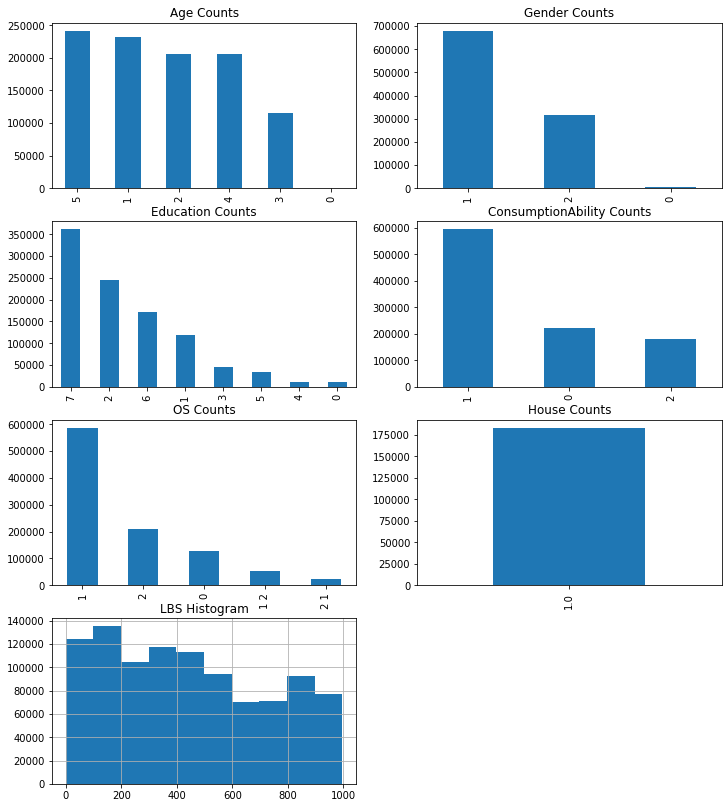

In [40]:
# Set up a grid of plots
fig = plt.figure(figsize=(12,14)) 
fig_dims = (4, 2)

# age
plt.subplot2grid(fig_dims, (0, 0))
user_feature['age'].value_counts().plot(kind='bar', title='Age Counts') 
# gender
plt.subplot2grid(fig_dims, (0, 1))
user_feature['gender'].value_counts().plot(kind='bar', title='Gender Counts')
# education
plt.subplot2grid(fig_dims, (1, 0))
user_feature['education'].value_counts().plot(kind='bar', title='Education Counts')
# consumptionAbility
plt.subplot2grid(fig_dims, (1, 1))
user_feature['consumptionAbility'].value_counts().plot(kind='bar', title='ConsumptionAbility Counts')
# os
plt.subplot2grid(fig_dims, (2, 0))
user_feature['os'].value_counts().plot(kind='bar', title='OS Counts')
# house
plt.subplot2grid(fig_dims, (2, 1))
user_feature['house'].value_counts().plot(kind='bar', title='House Counts')
# LBS histogram
plt.subplot2grid(fig_dims, (3, 0))
user_feature['LBS'].hist()
plt.title('LBS Histogram')

<span id="1"><font size=5>Age:</font></span>

In [39]:
age = user_feature['age']
age.value_counts()

5    241604
1    231818
2    205705
4    205026
3    115336
0       511
Name: age, dtype: int64

这里取值age取值为零的条目远少于其他条目，两个可能：数据分布的问题，切分数据时并没有shuffle；数据本身分布不均匀

<span id="2"><font size=5>Gender:</font></span>

In [34]:
gender = user_feature['gender']
gender.value_counts()

1    680200
2    316659
0      3141
Name: gender, dtype: int64

性别这边按照数据说明，应该只有两个取值，这里感觉像是在搞事情。下面简单做一下联合分析

In [35]:
gender_edu = pd.crosstab(user_feature['gender'], user_feature['education'])
gender_edu.head()

education,0,1,2,3,4,5,6,7
gender,,,,,,,,
0,1181,270,1130,166,2,4,206,182
1,6939,84881,162161,30719,8001,23312,117908,246279
2,1820,34571,81236,15429,3142,10799,54502,115160


Text(0, 0.5, 'education')

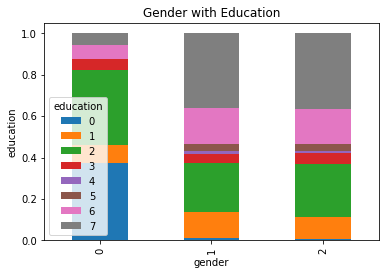

In [36]:
gender_edu_pct = gender_edu.div(gender_edu.sum(1).astype(float), axis=0)
gender_edu_pct.plot(kind='bar', stacked=True, title='Gender with Education')
plt.xlabel('gender')
plt.ylabel('education')

很显然gender 1和2（男/女）和教育程度关系分布几乎一致，但gender为零的用户education主要集中在低层次阶段。有可能在原始数据采集系统中，性别并非必填项，系统采取补0处理。

Text(0, 0.5, 'consumptionAbility')

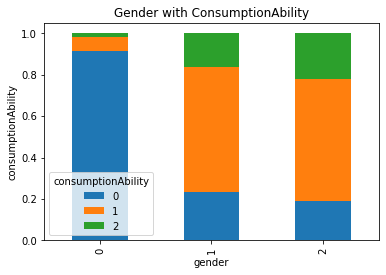

In [37]:
gender_edu = pd.crosstab(user_feature['gender'], user_feature['consumptionAbility'])
gender_edu.head()
gender_edu_pct = gender_edu.div(gender_edu.sum(1).astype(float), axis=0)
gender_edu_pct.plot(kind='bar', stacked=True, title='Gender with ConsumptionAbility')
plt.xlabel('gender')
plt.ylabel('consumptionAbility')

本想通过看消费能力，判断性别，但好像并无法看出什么。所以这个值也不太好具体分配取哪一个值，希望做关联分析的队员可以在这里探讨一下。

<span id="3"><font size=5>LBS</font></span>

In [3]:
LBS = user_feature['LBS']
LBS.head()

0    458.0
1    682.0
2    809.0
3    774.0
4    176.0
Name: LBS, dtype: float64

In [100]:
len(LBS.unique())  # 652-1 nan value
LBS.value_counts()

458.0    32213
112.0    28999
809.0    28062
275.0    25768
585.0    25388
         ...  
26.0         1
390.0        1
665.0        1
97.0         1
235.0        1
Name: LBS, Length: 651, dtype: int64

In [4]:
LBS.isna().sum()  # 5 nan value
LBS = LBS.fillna(LBS.mode().iloc[0])
# LBS.isna().sum()
user_feature['LBS'] = LBS
user_feature['LBS'].isna().sum()

0

只有5个缺失值，相对于整个数据集来说影响很小。这里选取地理位置的众数对缺失值进行补全

<span id="4"><font size=5>house</font></span>

In [5]:
house = user_feature['house']
house.head()
house.value_counts()

1.0    183490
Name: house, dtype: int64

In [6]:
house.isna().sum() # 816510
house = house.fillna(0.0)
house.isna().sum()
user_feature['house'] = house
# user_feature['house'].isna().sum()

0

有80%的缺失值，以0.0填充。

<span id="5"><font size=5>other ont_hot feature</font></span>

对于 consumptionAbility、carrier没有空值，且都是标准的离散数据类型，不做额外处理。对于ct、os，分析如下：              

In [103]:
ct = user_feature['ct']
ct.value_counts()

3 1      283648
1 3      228051
3        143436
0        124242
3 1 4     28729
          ...  
4 1 2        54
4 2 1        26
2 4          24
2 4 1        21
4 2          18
Name: ct, Length: 65, dtype: int64

In [104]:
os = user_feature['os']
os.value_counts()

1      586712
2      208765
0      127653
1 2     54708
2 1     22162
Name: os, dtype: int64

虽然取值类型为object,但多个取值可以理解为用户在该属性上的不同的选择，且顺序是有一定意义的，即代表每种取值的偏好，eg：2 1 != 1 2

<span id="6"><font size=5>count feature</font></span>

In [7]:
c_features = ['marriageStatus','appIdAction','appIdInstall','interest1','interest2','interest3','interest4','interest5','kw1','kw2','kw3','topic1','topic2','topic3']
for f in c_features:
    user_feature[f] = user_feature[f].fillna('-1')

In [8]:
feat = 'marriageStatus'
fd = user_feature[feat]
print(fd.head())
print(fd.value_counts())
fd_values = set()
for x in fd:
    try:
        x = x.split()
        for p in x:
            fd_values.add(p)
    except:
        print(x)
print(fd_values)

0      11
1      11
2    6 13
3      10
4      10
Name: marriageStatus, dtype: object
10          373526
11          316715
13 10       122730
0            67843
13           29119
15           23617
12 13        16345
6 13         14783
2 13          9329
13 9          9009
5 13          7536
13 15         6287
6 13 9        1476
12 13 9        825
2 13 9         544
5 13 9         276
3               17
14              12
12 13 10         6
15 10            4
13 15 10         1
Name: marriageStatus, dtype: int64
{'10', '11', '0', '6', '2', '15', '3', '14', '9', '13', '12', '5'}


<span id="7"><font size=5>Vector</font></span>

In [9]:
from  sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse

In [146]:
onehot_feature = ['age','gender','education','consumptionAbility','LBS','house','os','ct','carrier']
for f in onehot_feature:
    try:
        user_feature[f] = LabelEncoder().fit_transform(user_feature[f].apply(int))
    except:
        user_feature[f] = LabelEncoder().fit_transform(user_feature[f])

In [166]:
X_onehot = pd.DataFrame()
for f in onehot_feature:
    fd = user_feature[f]
    encode_matrix = OneHotEncoder(categories='auto').fit_transform(fd.values.reshape(-1,1))
    X_onehot = sparse.hstack((X_onehot,encode_matrix))
X_onehot.toarray()[:5]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [1]:
X_count = pd.DataFrame()
count_feature = ['marriageStatus','appIdAction','appIdInstall','interest1','interest2','interest3','interest4','interest5','kw1','kw2','kw3','topic1','topic2','topic3']
for f in count_feature:
    fd = user_feature[f]
    encode_matrix = CountVectorizer().fit_transform(fd)
    X_count = sparse.hstack((X_count,encode_matrix))
X_count.toarray()[:5]

NameError: name 'pd' is not defined